In [212]:
import numpy as np
import sys
import pandas
import nsfg
import thinkstats2
import thinkplot
import math
import first
import random
from scipy import stats
from estimation import RMSE, MeanError

In [214]:
# Exercise 7-1
'''Using data from the NFSG, make a scatter plot of birth weight veres mother's age. Plot percentiles
of birth weight verses mother's age. Compute Pearson's and Spermans correlations. How would you characterize
the relationship between these variables?'''
# Imports data from NSFG with birth weight verses mother's age
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
ages = live.agepreg
weights = live.totalwgt_lb
print('Exercise 7-1 Results')

Exercise 7-1 Results


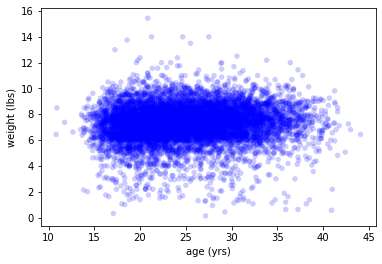

<Figure size 576x432 with 0 Axes>

In [215]:
# Make a scatter plot of birth weight verses mother's age
thinkplot.Scatter(ages, weights)
thinkplot.Config(xlabel='age (yrs)', ylabel='weight (lbs)', legend=True)
thinkplot.show()

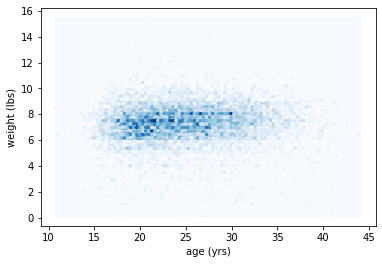

<Figure size 576x432 with 0 Axes>

In [201]:
# Creates Hex Bins
thinkplot.HexBin(ages, weights)
thinkplot.Config(xlabel='age (yrs)', ylabel='weight (lbs)', legend=True)
thinkplot.show()

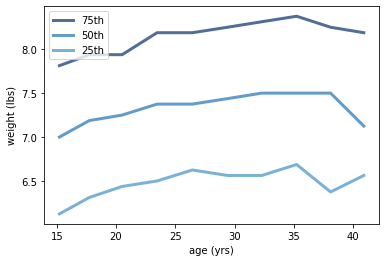

<Figure size 576x432 with 0 Axes>

In [202]:
# Plot percentiles of birth weight verses mother's age

df = live.dropna(subset=['agepreg','totalwgt_lb'])
bins = np.arange(10, 48, 3)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

ages = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)
    thinkplot.Config(xlabel='age (yrs)', ylabel='weight (lbs)', legend=True)
thinkplot.show()

In [194]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [195]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

PCorr = Corr(df.agepreg, df.totalwgt_lb)

# Spearman's Correlation
def SpearmanCoor(xs, ys):
    xranks = pandas.Series(xs).rank()
    yranks = pandas.Series(ys).rank()
    return Corr(xranks, yranks)

SCorr = SpearmanCoor(df.agepreg, df.totalwgt_lb)
print('The Pearsons Correlation is: ',PCorr)
print('The Spearmans Correlation is: ',SCorr)

The Pearsons Correlation is:  0.0688339703541091
The Spearmans Correlation is:  0.09461004109658226


In [205]:
# How would I characterize the relationship between these variables
print('I would categorize the relationship between variables as non-linear since there the correlation values are close to 0')


I would categorize the relationship between variables as non-linear since there the correlation values are close to 0


In [197]:
'''
In this chapter we used x¯ and median to estimate μ, and found that x¯ yields lower MSE.
Also, we used S and Sn-1 to estimate σ, and found that S is biased and Sn-1 is unbiased.
Run similar experiments to see if x¯ and median are biased estimates of μ. Also check
whether S or Sn-1 yields a lower MSE.
'''
# Runs Experiments to see if x¯ and median are biased estimates of μ
def Estimate1(n=7, m=1000):
    mu = 0
    sigma = 1
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    print('The mean error xbar is:', MeanError(means, mu))
    print('The mean error median is:', MeanError(medians, mu))

# Checks to see if it lowers a lower MSE
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1
    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
    print('The mean error biased is:', MeanError(estimates1, sigma**2))
    print('The mean error unbiased is:', MeanError(estimates2, sigma**2))
print('Exercise 8-1 Results')
Estimate1()
Estimate2()

Exercise 8-1 Results
The mean error xbar is: -0.014482876374946971
The mean error median is: -0.011922166694830873
The mean error biased is: -0.18989901524332503
The mean error unbiased is: -0.0548821844505459


Exercise 8-2 Results
The standard error is: 0.06131660696453305
The confidence interval is: (1.2485514878315824, 3.5858205148101865)
10 0.8610763540428239
The standard error is: 0.06131660696453305
The confidence interval is: (1.7076329485423947, 2.3898226515501846)
100 0.2054282961845561
The standard error is: 0.06131660696453305
The confidence interval is: (1.9047100270946875, 2.1050483387070784)
1000 0.06180540357025022


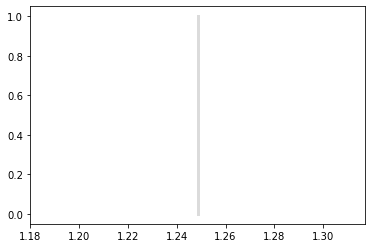

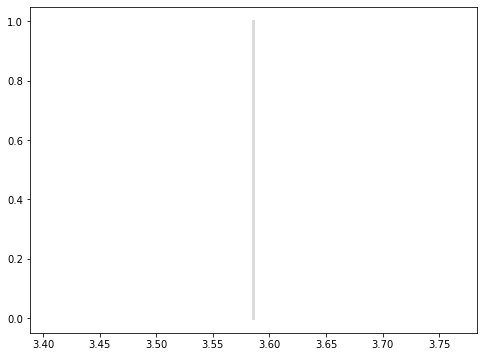

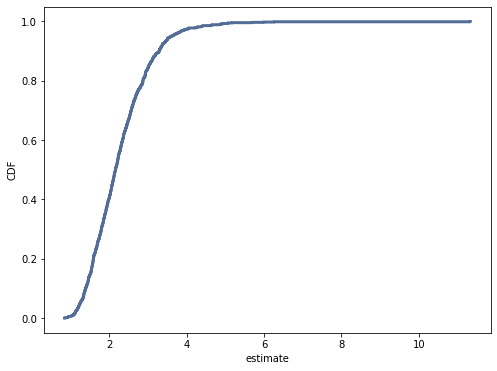

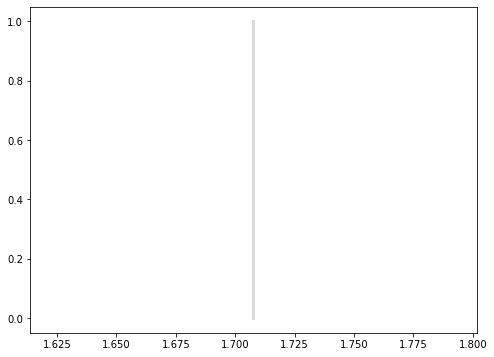

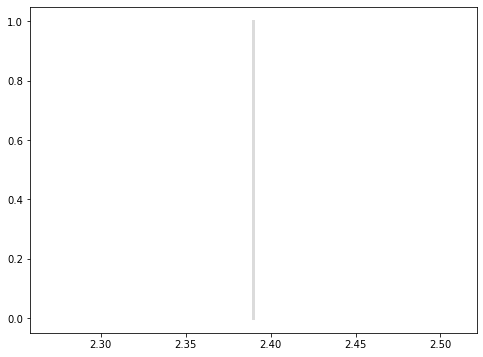

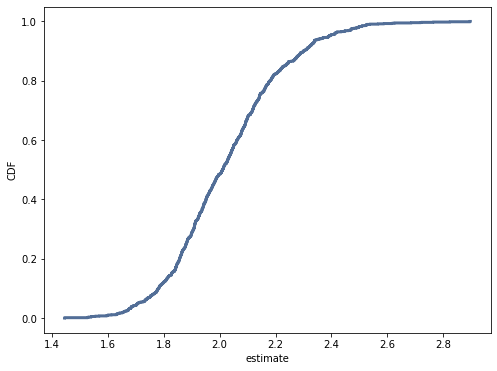

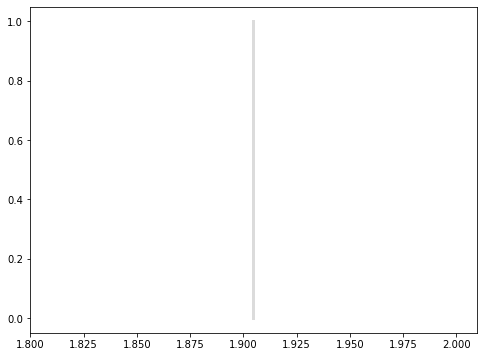

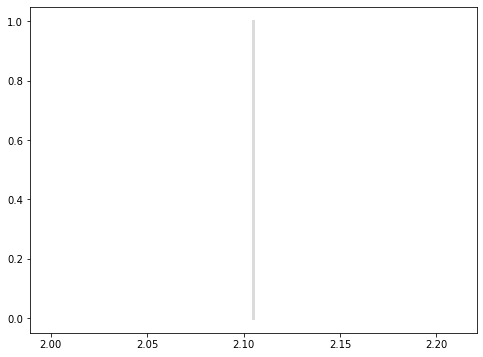

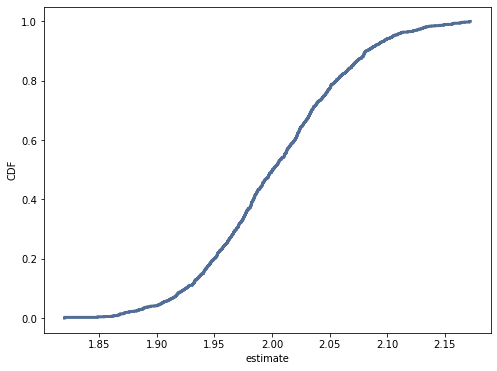

<Figure size 576x432 with 0 Axes>

In [207]:
'''
Suppose that you draw a sample with size n = 10 from an exponential distribution with
λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the
estimate L. Compute the standard error of the estimate and the 90% confidence interval.
Repeat the experiment with a few different values of n and make a plot of standard error
versus n.
'''

def SimulateSample(lam=2, n=10, m=1000):
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)
        thinkplot.show()
    estimates = []
    for j in range(m):
        xs = np.random.exponential(1/lam, n)
        lamhat = 1/np.mean(xs)
        estimates.append(lamhat)

# Gets RMSE and sprints the standard error
    standarderr = RMSE(estimates, lam)
    print('The standard error is:', stderr)

#calculates the cdf and ci and prints the ci
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('The confidence interval is:', ci)
    VertLine(ci[0])
    VertLine(ci[1])

# Plots the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate', ylabel='CDF', legend=True)
    thinkplot.show()

    return standarderr

print('Exercise 8-2 Results')
for n in [10, 100, 1000]:
    standarderr = SimulateSample(n=n)
    print(n, standarderr)